Import Libraries


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import warnings
warnings.filterwarnings('ignore')

load data

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Data cleaning

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df = df.replace("N/A", pd.NA)  # Replace "N/A" with pd.NA
imputer = SimpleImputer(strategy="mean")  # Use mean imputation for missing numerical values
df[["bmi"]] = imputer.fit_transform(df[["bmi"]])

# Encode categorical variables
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OneHotEncoder(drop="first", sparse=False)
encoded_cols = encoder.fit_transform(df[categorical_cols])
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df, encoded_cols_df], axis=1)
df.drop(categorical_cols, axis=1, inplace=True)

In [ ]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,28.893237,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.500000,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.400000,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,44873,81.0,0,0,125.20,40.000000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,19723,35.0,0,0,82.99,30.600000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,51.0,0,0,166.29,25.600000,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   float64
 8   gender_Other                    5110 non-null   float64
 9   ever_married_Yes                5110 non-null   float64
 10  work_type_Never_worked          5110 non-null   float64
 11  work_type_Private               5110 non-null   float64
 12  work_type_Self-employed         51

In [ ]:
df.drop("id", axis = 1, inplace=True)

In [ ]:
df.drop(df[df['age'] < 1].index, inplace=True)


EDA

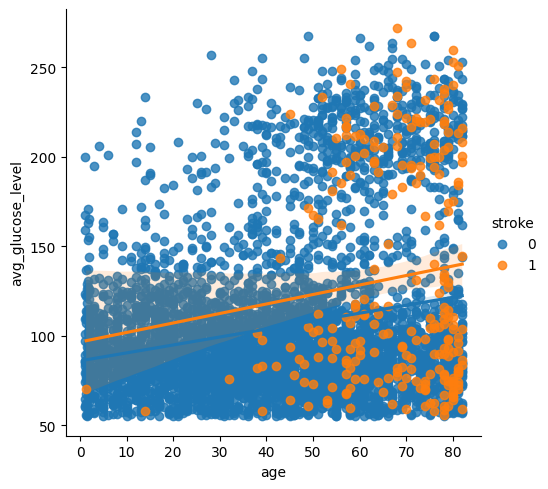

In [ ]:
sns.lmplot(df, x='age',y='avg_glucose_level', hue='stroke');

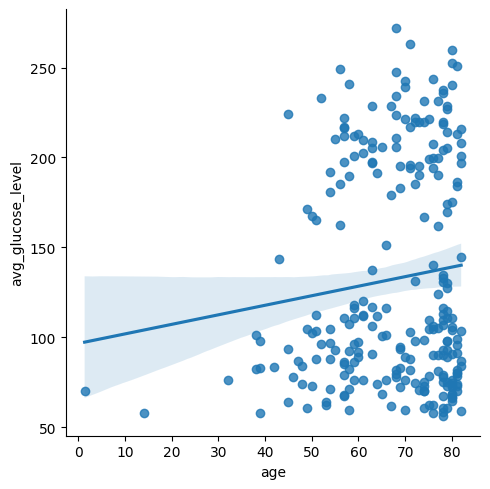

In [ ]:
sns.lmplot(data=df.query('stroke==1'), x='age', y='avg_glucose_level')

<Axes: xlabel='age', ylabel='Count'>

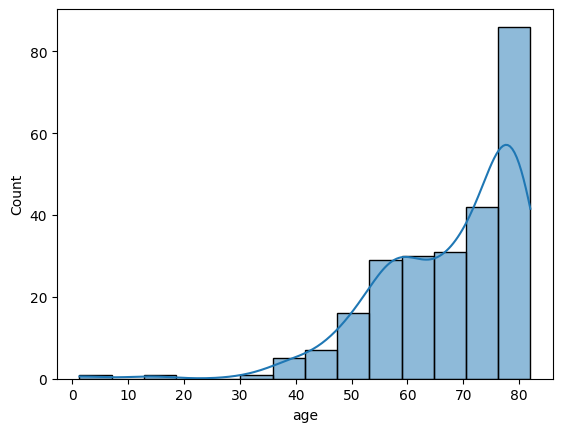

In [ ]:
sns.histplot(data=df.query('stroke==1'), x='age', kde=True)

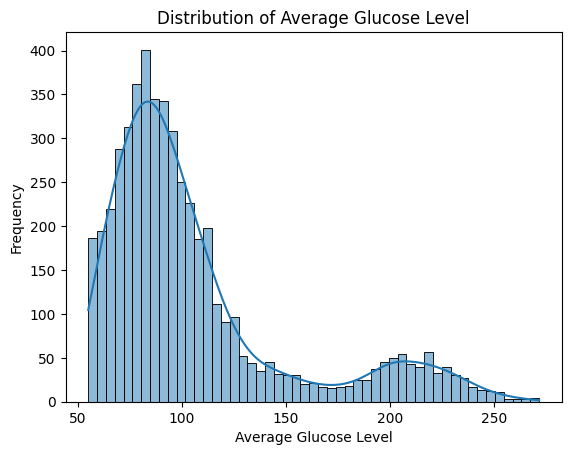

In [ ]:
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

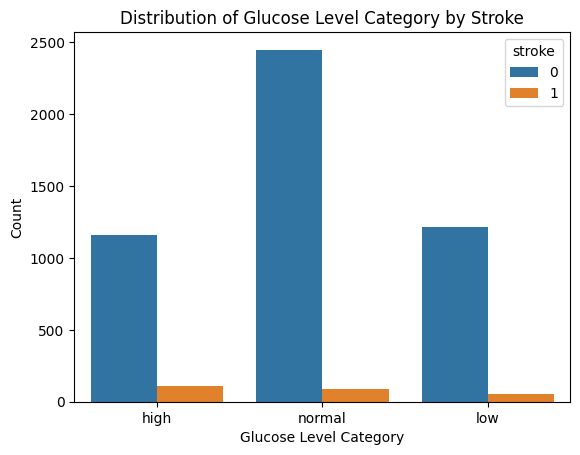

In [ ]:
lower_limit = df['avg_glucose_level'].quantile(0.25)
upper_limit = df['avg_glucose_level'].quantile(0.75)
def Categorize_glucose(glucose):
    if glucose < lower_limit:
        return 'low'
    elif glucose <= upper_limit:
        return 'normal'
    else:
        return 'high'
df['Categorize_glucose'] = df['avg_glucose_level'].apply(Categorize_glucose)
sns.countplot(data=df, x='Categorize_glucose', hue='stroke')
plt.title('Distribution of Glucose Level Category by Stroke')
plt.xlabel('Glucose Level Category')
plt.ylabel('Count')
plt.show()

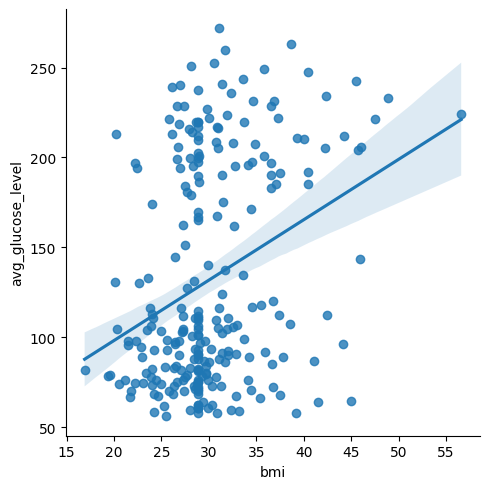

In [ ]:
sns.lmplot(data=df.query('stroke==1'), x='bmi', y='avg_glucose_level')

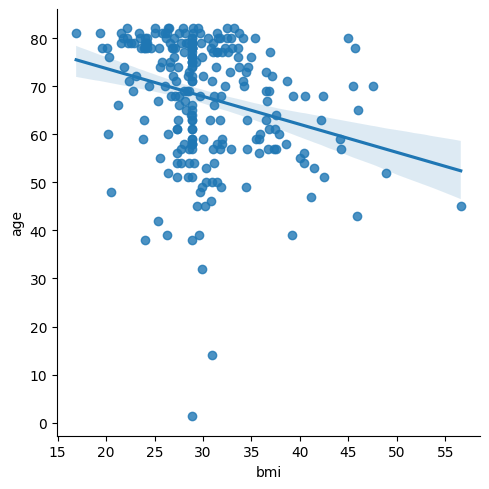

In [ ]:
sns.lmplot(data=df.query('stroke==1'), x='bmi', y='age')

<Axes: >

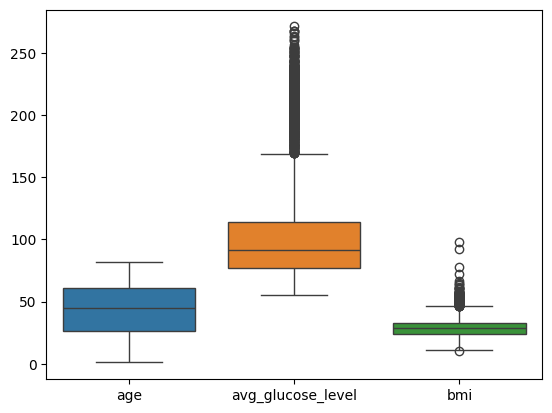

In [ ]:
sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

<Axes: >

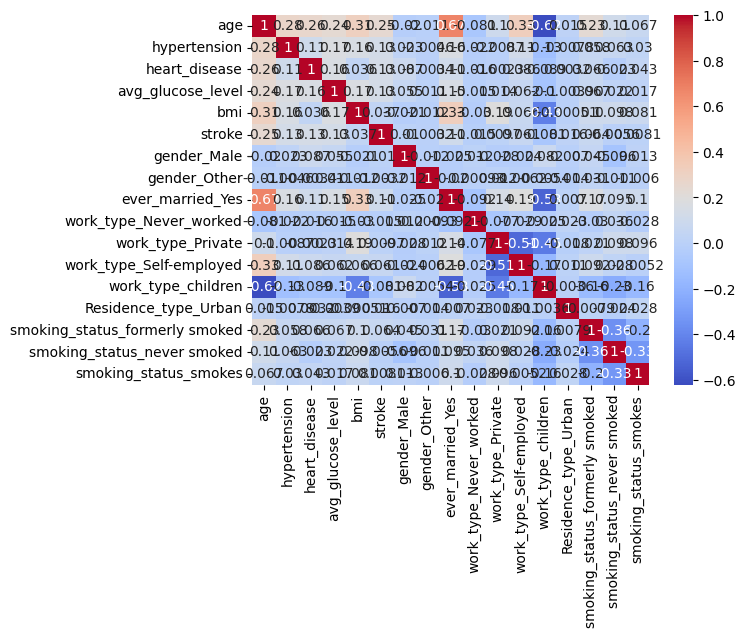

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Machine Learning Model

In [ ]:
df.drop("Categorize_glucose", axis = 1, inplace=True)

In [ ]:
# Split data into features and target variable
X = df.drop("stroke", axis=1)
y = df["stroke"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# Scale numerical features
numerical_cols = ["age", "avg_glucose_level", "bmi"]
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

Logistic Regression

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1439
           1       0.00      0.00      0.00        82

    accuracy                           0.95      1521
   macro avg       0.47      0.50      0.49      1521
weighted avg       0.90      0.95      0.92      1521



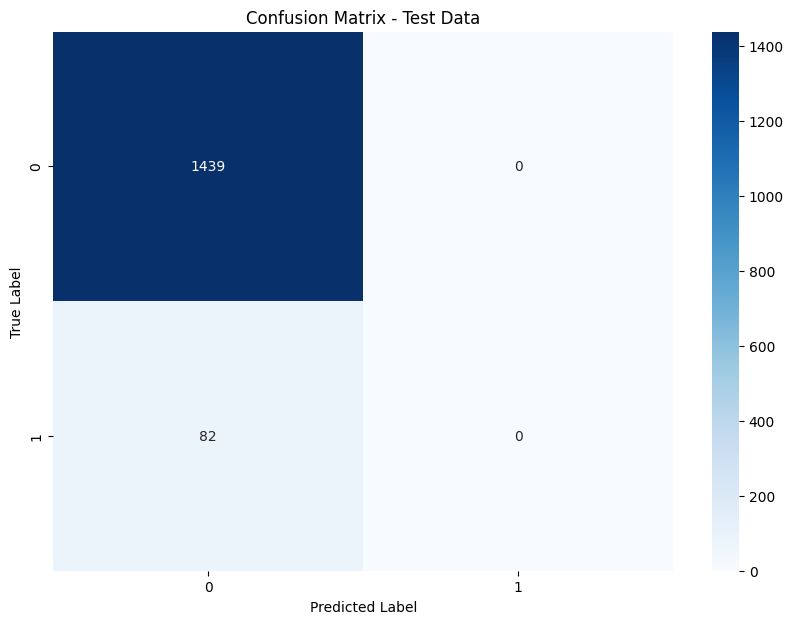

Cross-validated scores for Logistic Regression:
[0.95211268 0.95345557 0.95345557 0.95345557 0.95204513]
Mean Cross-Validation Score of Logistic Regression: 0.9529049047458231


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
# Logistic Regression Model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

# Predictions
y_test_hat = classifier.predict(X_test)

# Classification Report
classification_rep = classification_report(y_test, y_test_hat)
print("Classification Report for Logistic Regression Model:")
print(classification_rep)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Cross-validated scores for Logistic Regression
lr_cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Print cross-validated scores
print("Cross-validated scores for Logistic Regression:")
print(lr_cv_scores)

# Calculate mean cross-validated score
mean_cv_score_logistic = lr_cv_scores.mean()
print("Mean Cross-Validation Score of Logistic Regression:", mean_cv_score_logistic)

Random Forest

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1439
           1       0.00      0.00      0.00        82

    accuracy                           0.94      1521
   macro avg       0.47      0.50      0.49      1521
weighted avg       0.89      0.94      0.92      1521



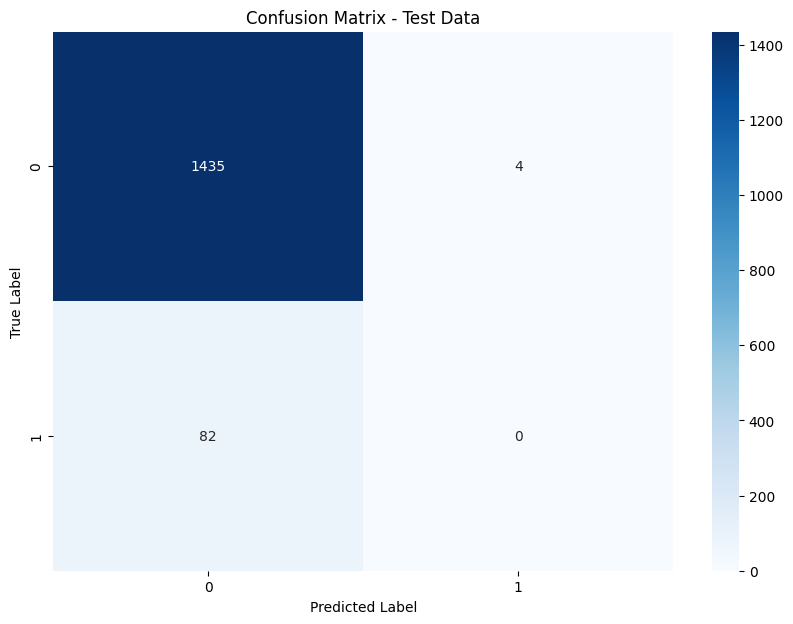

Cross-validated scores for Random Forest:
[0.95211268 0.9506347  0.95345557 0.95486601 0.9506347 ]
Mean Cross-Validation Score of Random Forest: 0.952340729851606


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming you have X_train, y_train, X_test, y_test already defined

# Random Forest Model
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# Predictions
y_test_hat_rf = classifier_rf.predict(X_test)

# Classification Report
classification_rep_rf = classification_report(y_test, y_test_hat_rf)
print("Classification Report for Random Forest Model:")
print(classification_rep_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_hat_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Cross-validated scores for Random Forest
rf_cv_scores = cross_val_score(classifier_rf, X_train, y_train, cv=5)

# Print cross-validated scores
print("Cross-validated scores for Random Forest:")
print(rf_cv_scores)

# Calculate mean cross-validated score
mean_cv_score_rf = rf_cv_scores.mean()
print("Mean Cross-Validation Score of Random Forest:", mean_cv_score_rf)


SVM

Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1439
           1       0.00      0.00      0.00        82

    accuracy                           0.95      1521
   macro avg       0.47      0.50      0.49      1521
weighted avg       0.90      0.95      0.92      1521



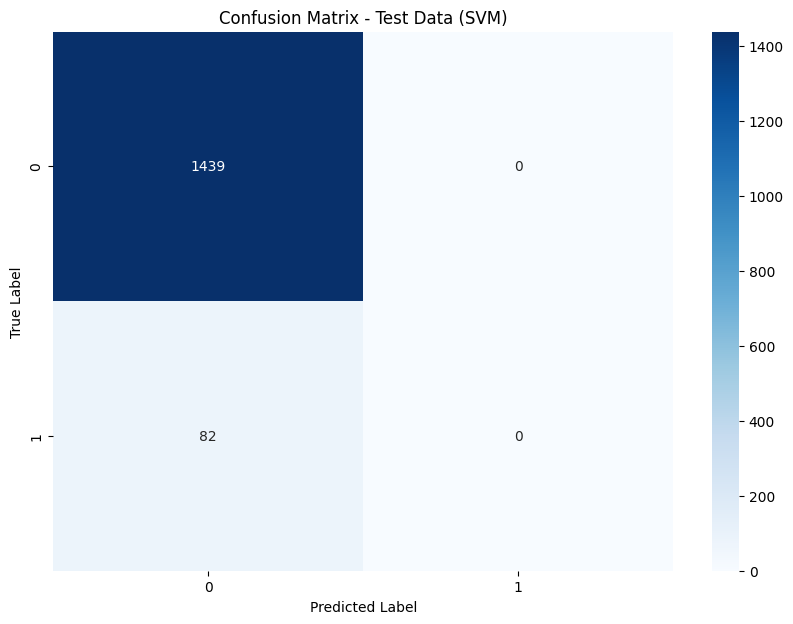

Cross-validated scores for SVM:
[0.95211268 0.95345557 0.95345557 0.95345557 0.95204513]
Mean Cross-Validation Score of SVM: 0.9529049047458231


In [ ]:
from sklearn.svm import SVC

# SVM Model
classifier_svm = SVC(kernel='linear', C=1.0, random_state=42)
classifier_svm.fit(X_train, y_train)

# Predictions
y_test_hat_svm = classifier_svm.predict(X_test)

# Classification Report for SVM Model
classification_rep_svm = classification_report(y_test, y_test_hat_svm)
print("Classification Report for SVM Model:")
print(classification_rep_svm)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_test_hat_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Test Data (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Cross-validated scores for SVM
svm_cv_scores = cross_val_score(classifier_svm, X_train, y_train, cv=5)

# Print cross-validated scores
print("Cross-validated scores for SVM:")
print(svm_cv_scores)

# Calculate mean cross-validated score
mean_cv_score_svm = svm_cv_scores.mean()
print("Mean Cross-Validation Score of SVM:", mean_cv_score_svm)

Comparing

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.5f}")


Logistic Regression Accuracy: 0.94609
Random Forest Accuracy: 0.94477
SVM Accuracy: 0.94609


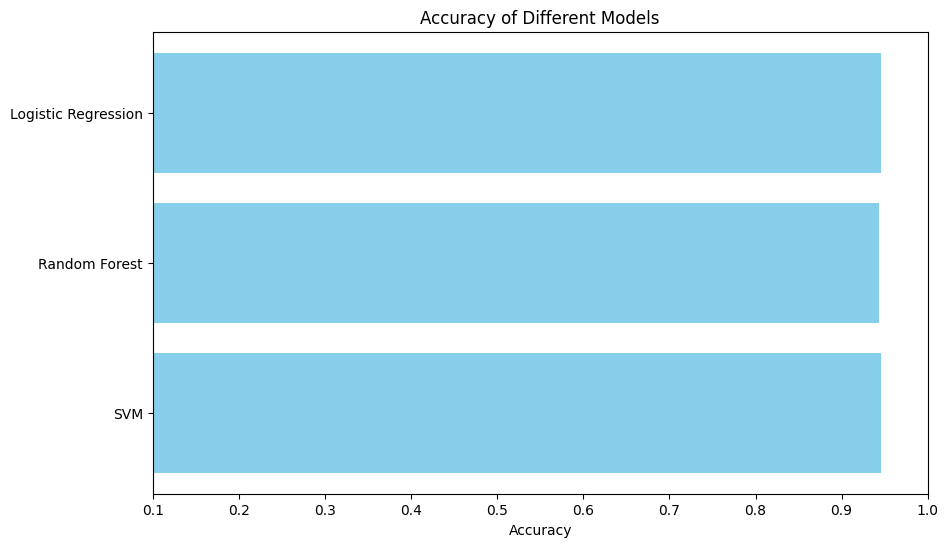

In [ ]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0.1,1.0 )
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pickle
filename = 'healthcare-dataset-stroke-data.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.814815,0,1,0.801265,0.301260,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.740741,0,0,0.679023,0.212981,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975309,0,1,0.234512,0.254296,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.592593,0,0,0.536008,0.276060,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.962963,1,0,0.549349,0.156930,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975309,1,0,0.132167,0.212981,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,0.987654,0,0,0.323516,0.340206,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,0.419753,0,0,0.128658,0.232532,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.617284,0,0,0.513203,0.175258,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
